# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/iowa.csv')
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [3]:
def get_profit(df):
    return (df["Bottles Sold"] * (df["State Bottle Retail"] - df["State Bottle Cost"])).sum()

grouped = df.groupby("Item Description").apply(get_profit).sort_values(ascending = False)

top10 = grouped.head(10)
top10

/var/folders/yb/69jvqn_52szfqjzyzmz2vk0h0000gn/T/ipykernel_16997/3858311452.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby("Item Description").apply(get_profit).sort_values(ascending = False)


Item Description
TITOS HANDMADE VODKA               364074.35
BLACK VELVET                       274676.85
FIREBALL CINNAMON WHISKEY          187535.22
CROWN ROYAL                        160981.95
CROWN ROYAL REGAL APPLE            122880.40
CAPTAIN MORGAN SPICED RUM          121115.30
HAWKEYE VODKA                      116375.04
CAPTAIN MORGAN ORIGINAL SPICED     112146.71
JACK DANIELS OLD #7 BLACK LABEL    111509.09
HENNESSY VS                        108459.45
dtype: float64

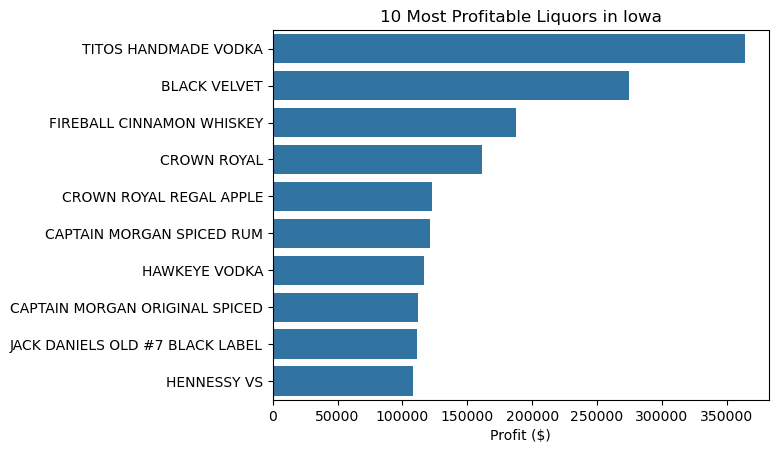

In [4]:
top10_df = top10.reset_index()
top10_df.columns = ['Item Description', 'Profit']

sns.barplot(
    data = top10_df,
    x = 'Profit',
    y = 'Item Description'
)
plt.title('10 Most Profitable Liquors in Iowa')
plt.ylabel('')
plt.xlabel('Profit ($)')
plt.show()


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [5]:
import numpy as np

In [6]:
x = np.array([1,3,5])
y = np.array([2,5])

In [7]:
#x - y

When trying to subtract vectors of different length/shape, you receive a ValueError.

In [8]:
x.reshape(-1, 1) - y.reshape(1, -1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

You get a 3x2 array whose rows are the pairwise differences for x's elements (i.e., row1 = [x1-y1, x1-y2]) and whose columns are the pairwise differences for y's elements (i.e., col1 = [x1-y1, x2-y1, x3-y1]).

In [9]:
x.reshape(1, -1) - y.reshape(-1, 1)

array([[-1,  1,  3],
       [-4, -2,  0]])

Everything flips! Now the rows correspond to the y's and the columns to the x's.

In [10]:
x = np.array([1, 3, 5])
y = np.array([2, 5])

# 3x2
result = np.zeros((3, 2))

for i in range(3): # loop through the x_i's
    for j in range(2): # loop through the y_j's
        result[i, j] = x[i] - y[j]
print(result)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


In [11]:
# 2x3
result = np.zeros((2, 3))

for i in range(2): # loop through the y_i's
    for j in range(3): # loop through the x_j's
        result[i, j] = x[j] - y[i]
print(result)

[[-1.  1.  3.]
 [-4. -2.  0.]]


In [12]:
x.reshape(1, -1)
x

array([1, 3, 5])

Both x.reshape(1, -1) and x.reshape(-1, 1) give x a second dimension. In the case of the former, we supply the number of rows and let reshape() infer the columns, whereas with the latter we assign x a single column and let reshape() decide the rows. The reshaped arrays are essentially row and column vectors, respectively.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

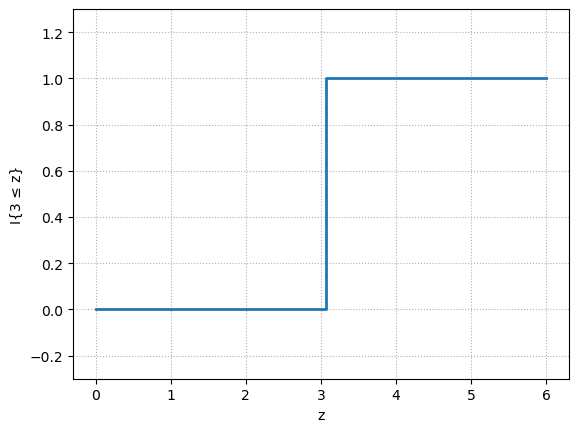

In [14]:
# define z
z = np.linspace(0, 6)

# define indicator function for x = 3
indicator = (z >= 3).astype(int)

plt.plot(z, indicator, drawstyle = 'steps-post', linewidth = 2)
plt.ylim(-0.3, 1.3)
plt.xlabel("z")
plt.ylabel("I{3 ≤ z}")
plt.grid(True, linestyle = ':')
plt.show()

If $\mathbb{I}\{ x \le z \}$ = 1, then $\mathbb{I}\{ x > z \}$ = 0 and if $\mathbb{I}\{ x > z \}$ = 1, then $\mathbb{I}\{ x \le z \}$ = 0.

Thus...

Case I: $\mathbb{I}\{ x > z \}$ = 0 and 1 - $\mathbb{I}\{ x \le z \}$ = 1 - 1 = 0.

Case II: $\mathbb{I}\{ x > z \}$ = 1 and 1 - $\mathbb{I}\{ x \le z \}$ = 1 - 0 = 0.

In [15]:
def get_ecdf(X):
    Z = np.sort(X) # sort x
    compare = X.reshape(-1, 1) <= Z.reshape(1, -1) # compare X to Z

    ecdf = np.mean(compare, axis = 0) # compute proportion of x's <= each z

    return ecdf, Z


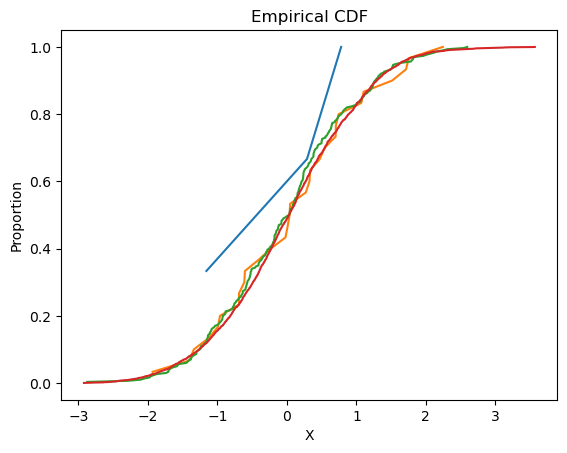

In [16]:
rng = np.random.default_rng(100)

for N in (3, 30, 300, 3000):
    X = rng.normal(0, 1, N)

    X_ecdf = get_ecdf(X)

    plt.plot(X_ecdf[1], X_ecdf[0])
    plt.title('Empirical CDF')
    plt.ylabel('Proportion')
    plt.xlabel('X')


As N increases, the ECDF smoothes. For the first three iterations (i.e., when N = 3, 30, and 300), the individual "steps" from one value to the next are still visible. However, by the time N reaches 3000, the values are too close together to notice any stepwise jumps, even in the tails.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [17]:
def get_quantile(X, q):
    sorted = np.sort(X)
    n = len(sorted)

    # position index (linear interpolation)
    pos = (n - 1)*q
    lower = int(pos)
    upper = lower + 1

    if upper >= n:
        return float(sorted[lower])
    else:
        weight = pos - lower
        return (1 - weight)*sorted[lower] + weight*sorted[upper]

In [18]:
def get_iqr(X): # and whiskers!
    # first and third quartiles
    q1 = get_quantile(X, .25)
    q3 = get_quantile(X, .75)

    # iqr
    iqr = q3 - q1

    # whisker bounds
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    # whiskers
    sorted = np.sort(X)
    l_whisker = min([x for x in sorted if x >= lower], default = sorted[0])
    u_whisker = max([x for x in sorted if x <= upper], default = sorted[-1])

    return iqr, l_whisker, u_whisker

In [19]:
def get_5numsum(X):
    minimum = min(X)
    q1 = get_quantile(X, .25)
    median = get_quantile(X, .5)
    q3 = get_quantile(X, .75)
    maximum = max(X)

    l_whisker = get_iqr(X)[1] # lower whisker (equal to min if no outliers)
    u_whisker = get_iqr(X)[2] # upper whisker (equal to max if no outliers)

    return minimum, l_whisker, q1, median, q3, u_whisker, maximum

In [20]:
def get_outliers(X):
    l_whisker = get_iqr(X)[1]
    u_whisker = get_iqr(X)[2]

    return [(x < l_whisker) or (x > u_whisker) for x in X]

In [21]:
ames = pd.read_csv('./data/ames_prices.csv')
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [22]:
get_5numsum(ames['price'])

(12789,
 np.int64(12789),
 np.float64(129500.0),
 np.float64(160000.0),
 np.float64(213500.0),
 np.int64(338931),
 755000)

In [23]:
ames['price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

Looks good! Mine's not the easiest to read, but the common values (min, Q1, median, Q3, max) all match.

In [24]:
sum(get_outliers(ames['price']))

np.int64(137)

<Axes: ylabel='price'>

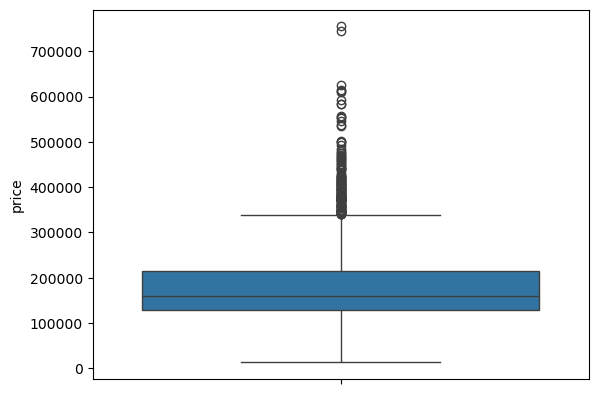

In [25]:
sns.boxplot(ames['price'])

The get_outliers() function tagged 137 outliers, which aligns with the boxplot's strong rightward skew.